In [3]:
import pandas as pd

def classify_mineral(row):
    if row['SiO2'] < 52 and row['MgO'] > 10 and row['FeO'] < 12:
        return 'Amphibole'
    elif 48 < row['SiO2'] < 56 and row['MgO'] > 12:
        return 'Clinopyroxene'
    elif row['MgO'] > 10 and row['FeO'] > 12:
        return 'Orthopyroxene'
    else:
        return 'Unknown'

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/EPMA S.1 Oxide Data.csv'  
data = pd.read_csv(file_path)

data['Mineral_Type'] = data.apply(classify_mineral, axis=1)

print(data[['SiO2', 'MgO', 'FeO', 'Mineral_Type']])


       SiO2      MgO      FeO   Mineral_Type
0   45.4520  14.8663  11.8075      Amphibole
1   45.3200  15.1027  11.4224      Amphibole
2   43.7609  14.4223  12.0803  Orthopyroxene
3   45.9171  15.2327  11.7397      Amphibole
4   44.0978  14.4161  12.2652  Orthopyroxene
..      ...      ...      ...            ...
57  46.1564  15.4800  10.9758      Amphibole
58  46.4493  15.7966  11.4361      Amphibole
59  46.0665  15.4508  11.5250      Amphibole
60  42.4757  13.5633  13.3506  Orthopyroxene
61  45.5336  15.2079  11.6371      Amphibole

[62 rows x 4 columns]


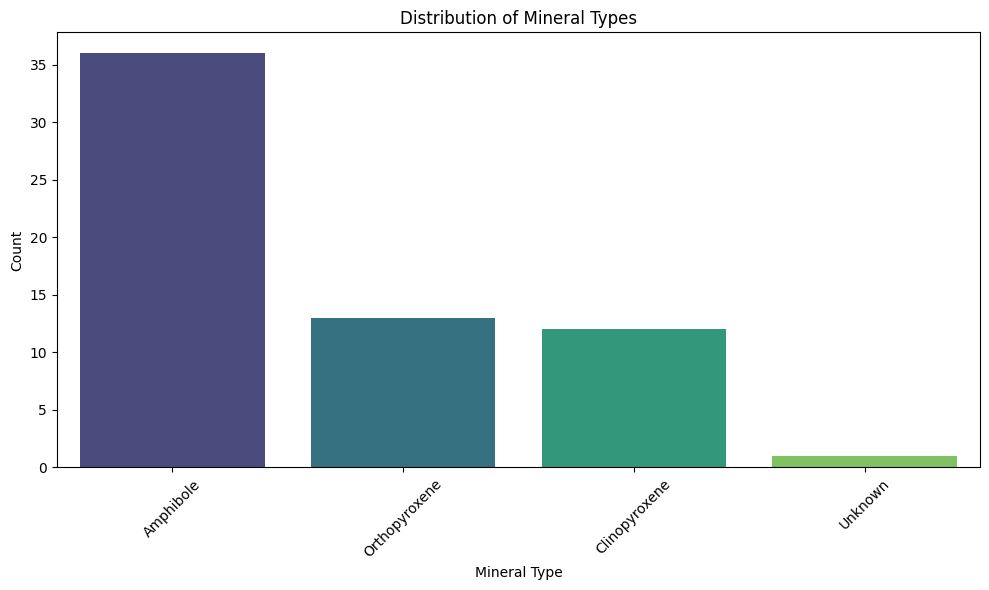

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to classify minerals based on composition
def classify_mineral(row):
    if row['SiO2'] < 52 and row['MgO'] > 10 and row['FeO'] < 12:
        return 'Amphibole'
    elif 48 < row['SiO2'] < 56 and row['MgO'] > 12:
        return 'Clinopyroxene'
    elif row['MgO'] > 10 and row['FeO'] > 12:
        return 'Orthopyroxene'
    else:
        return 'Unknown'

# Read the data file
file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/EPMA S.1 Oxide Data.csv'  
data = pd.read_csv(file_path)

# Apply the classification function
data['Mineral_Type'] = data.apply(classify_mineral, axis=1)

# Count the occurrences of each mineral type
mineral_counts = data['Mineral_Type'].value_counts()

# Plot the distribution of mineral types
plt.figure(figsize=(10, 6))
sns.barplot(x=mineral_counts.index, y=mineral_counts.values, palette='viridis')
plt.title('Distribution of Mineral Types')
plt.xlabel('Mineral Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def classify_mineral(row):
    if row['SiO2'] < 52 and row['MgO'] > 10 and row['FeO'] < 12:
        return 'Amphibole'
    elif 48 < row['SiO2'] < 56 and row['MgO'] > 12:
        return 'Clinopyroxene'
    elif row['MgO'] > 10 and row['FeO'] > 12:
        return 'Orthopyroxene'
    else:
        return 'Unknown'

file_path = '/Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/EPMA S.1 Oxide Data.csv'  
data = pd.read_csv(file_path)

data['Mineral_Type'] = data.apply(classify_mineral, axis=1)

mineral_counts = data['Mineral_Type'].value_counts()

# Create a directory to save the mineral type files
output_dir = os.path.dirname(file_path)
mineral_files = {}

# Filter data by mineral type and write to separate files
for mineral in mineral_counts.index:
    mineral_data = data[data['Mineral_Type'] == mineral]
    if not mineral_data.empty:
        # Prepare a new DataFrame with sample numbers at the front
        mineral_data_with_samples = mineral_data.copy()
        mineral_data_with_samples.insert(0, 'Sample_Number', mineral_data_with_samples.index + 1)  # Assuming 1-based sample numbers
        mineral_file_path = os.path.join(output_dir, f"{mineral}.csv")
        mineral_data_with_samples.to_csv(mineral_file_path, index=False)
        mineral_files[mineral] = mineral_file_path

# Print the paths of the created files
print("Mineral files created:")
for mineral, path in mineral_files.items():
    print(f"{mineral}: {path}")


Mineral files created:
Amphibole: /Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/Amphibole.csv
Orthopyroxene: /Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/Orthopyroxene.csv
Clinopyroxene: /Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/Clinopyroxene.csv
Unknown: /Users/tomassalazar/Desktop/Work/Krawcyzski Group/ESPM.Code/Petrology/Kamchatka/EPMA S.1 Analyses/EPMA RAW DATA/Unknown.csv
